In [ ]:
!pip3 install grimoirelab

In [ ]:
!pip install matplotlib

In [3]:
#notes:
# web tutorial: https://chaoss.github.io/grimoirelab-tutorial/perceval/git.html
# command line: 
# !pip3 install grimoirelab
# !perceval git 'https://github.com/bitcoin/bitcoin.git' --from-date '2021-07-14'
#
#
#! /usr/bin/env python3
from perceval.backends.core.git import Git
import datetime
import dateutil.rrule
import dateutil.tz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
# url for the git repo to analyze
repo_url1 = 'http://github.com/grimoirelab/perceval.git'
repo_url2 = 'https://github.com/bitcoin/bitcoin.git'
repo_url3 = 'https://github.com/ethereum/go-ethereum.git'
repo_url4 = 'https://github.com/input-output-hk/cardano-node.git'
repo_url5 = 'https://github.com/paritytech/polkadot.git'
repo_url6 = 'https://github.com/ripple/rippled.git'
repo_url7 = 'https://github.com/Uniswap/uniswap-v2-core.git'
repo_url8 = 'https://github.com/smartcontractkit/chainlink.git'
# directory for letting Perceval clone the git repo
# must be unique for the repo because it is reused
repo_dir = '/tmp/btc.git'

# create a Git object, pointing to repo_url, using repo_dir for cloning
repo = Git(uri=repo_url2, gitpath=repo_dir)
# fetch all commits as an iteratoir, and iterate it printing each hash

#fromDate = datetime.datetime(2021, 7, 14, 0, 0, 0,tzinfo=dateutil.tz.tzutc())

In [5]:
fromDate = datetime.datetime(2021, 1, 1)
toDate = datetime.datetime(2021, 7, 1)
count = 0
noTZ = 0
tz = []
for commit in repo.fetch(from_date=fromDate,to_date=toDate):
    count += 1
    # commit date is a string
    # print(commit['data']['CommitDate'])
    time = commit['data']['CommitDate']

    # this is now an aware date object and can be universally sequenced
    dateTimeObject = datetime.datetime.strptime(' '.join(time.split(' ')), '%a %b %d %H:%M:%S %Y %z')
    # trim out 'UTC' and convert to an integer
    i = str(dateTimeObject.tzinfo)[3:]
    # check empty string (no timezone given)
    if i == '': noTZ += 1
    elif i[0] == '-':
      res = (int(i[1:3])*-1) - (int(i[4:]) / 60)
    elif i[0] == '+':
        res = int(i[1:3]) + (int(i[4:]) / 60)
    tz.append(res)
    
print(count)
print(noTZ)


2771
91


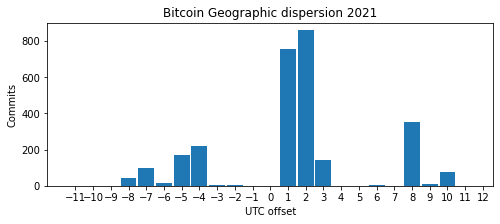

In [128]:
binss = np.linspace(-11, 12, 24) -0.5
xt = np.linspace(-11, 12, 24)
plt.figure(figsize=(8,3))
plot = plt.hist(tz,bins=binss,rwidth=0.9)
plt.xticks(xt)
plt.xlabel("UTC offset")
plt.ylabel("Commits")
plt.title("Bitcoin Geographic dispersion 2021")
#plt.savefig('plot_out.png',dpi=300)
plt.show()

In [123]:
plot[0]

array([  0.,   0.,   0.,  42.,  96.,  16., 168., 218.,   4.,   2.,   0.,
         0., 757., 858., 140.,   0.,   0.,   6.,   0., 355.,   8.,  75.,
         0.])

In [133]:
plot[1]

array([-11.5, -10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,
        -2.5,  -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,
         6.5,   7.5,   8.5,   9.5,  10.5,  11.5])

In [129]:
magnitude = plot[0]
bins = plot[1]
print("magnitude type ",type(magnitude))
print(magnitude.size)
print("bins type ",type(bins))
print(bins.size)

magnitude type  <class 'numpy.ndarray'>
23
bins type  <class 'numpy.ndarray'>
24


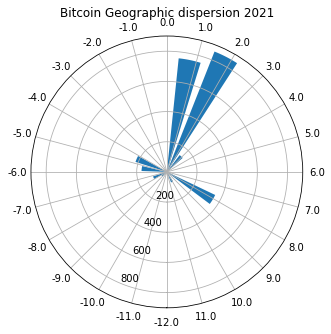

In [181]:
# polar histogram
N = 24
#bottom = 8
#max_height = 4
plt.figure(figsize=(5,5))
# 24 hour bins (hour 24 is hour 0, or -12 = +12)
r = magnitude
theta = np.linspace(-np.pi, np.pi, 23, endpoint=False)
width = (1.5*np.pi) / N

ax = plt.subplot(111, polar=True)
# have to offset radius by pi radians; no idea why
bars = ax.bar(theta + (np.pi + (np.pi/48)), r, width=width)

# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(np.linspace(-12, 11, 24))      

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(-np.pi/2)     

# Use custom colors and opacity
#for r, bar in zip(radii, bars):
#    bar.set_facecolor(plt.cm.jet(r / 10.))
#    bar.set_alpha(0.8)
#plt.title("Bitcoin Geographic dispersion 2021")
#plt.savefig('plot_out_polar.png',dpi=300)
plt.show()

In [22]:
theta

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
       330., 345.])

In [23]:
mag2

array([[ 42.,  96.,  16., 168., 218.,   4.,   2.,   0.,   0.,   0., 757.,
        858., 140.,   0.,   0.,   6.,   0.,   0., 355.,   8.,  75.,   0.,
         11.,  15.]])

In [28]:
magnitude

array([ 42.,  96.,  16., 168., 218.,   4.,   2.,   0.,   0.,   0., 757.,
       858., 140.,   0.,   0.,   6.,   0.,   0., 355.,   8.,  75.,   0.,
        11.,  15.])

In [ ]:
ax = plt.subplot(111, polar=True)
offset = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
ax.scatter(np.deg2rad(offset), ones)       

# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))      

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

plt.show()